<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">
<img border="0" src="https://www.polytechnique.edu/sites/all/institutionnel/institutpolytechniqueparis_logohorizontal.png" width="90%"> </td>
     <td style="background-color:transparent;">
<img border="0" src="" width="60%"> </td>
  </tr>
</table> 
</div>
<center><h1>Arabic News Category Prediction Challenge</h1></center>
<br/>
<center>Ahmad CHAMMA, Hadi ABDINE, Youssef FARHAT</center>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import datetime
import dateutil.parser as dparser
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.head(5)

,Id,Title,Date,Desc,Image,Type
0,1350004,"""التحكم المروري"": جريحان نتيجة تصادم بين 4 سيا...",الأحد 15 تموز 2018 - 21:20,\n,NaN,أخبار الساعة
1,1350008,الحواط: تحالفت مع القوات ووضعت يدي بيد جعجع ان...,الأحد 15 تموز 2018 - 21:28,\n,NaN,أخبار الساعة
2,1350002,وفاة طفل غرقا في عين الزرقاء,الأحد 15 تموز 2018 - 20:51,\n\n\tتوفي الطفل علي حسين العسكر من بلدة قب ال...,http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة
3,1350000,عدوان: لا شيء يمنع من تقاطع في العمل الحكومي و...,الأحد 15 تموز 2018 - 20:41,"\n\n\tأكد نائب رئيس حزب ""القوات اللبنانية"" عضو...",http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة
4,1350006,من هو أفضل لاعب في مونديال روسيا؟,الأحد 15 تموز 2018 - 21:26,\n\n\tتوج كابتن منتخب كرواتيا لوكا مودريتش بجا...,http://www.lebanonfiles.com/files/images/15-07...,أخبار رياضية


In [4]:
useful_categories = ['أخبار محليّة', 'أخبار فنية', 'أخبار اقتصادية ومالية', 'أخبار رياضية', 'أخبار إقليمية ودولية']
useful = data[data.Type.isin(useful_categories)]

In [5]:
useful.head(5)

,Id,Title,Date,Desc,Image,Type
2,1350002,وفاة طفل غرقا في عين الزرقاء,الأحد 15 تموز 2018 - 20:51,\n\n\tتوفي الطفل علي حسين العسكر من بلدة قب ال...,http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة
3,1350000,عدوان: لا شيء يمنع من تقاطع في العمل الحكومي و...,الأحد 15 تموز 2018 - 20:41,"\n\n\tأكد نائب رئيس حزب ""القوات اللبنانية"" عضو...",http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة
4,1350006,من هو أفضل لاعب في مونديال روسيا؟,الأحد 15 تموز 2018 - 21:26,\n\n\tتوج كابتن منتخب كرواتيا لوكا مودريتش بجا...,http://www.lebanonfiles.com/files/images/15-07...,أخبار رياضية
9,1350009,الحواط: تحالفت مع القوات ووضعت يدي بيد جعجع ان...,الأحد 15 تموز 2018 - 21:29,"\n\n\t أكد عضو كتلة ""الجمهورية القوية"" النائب ...",http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة
14,1350014,جريح في إشكال تطور إلى إطلاق نار في مخيم عين ا...,الأحد 15 تموز 2018 - 22:02,\n\n\tأفادت الوكالة الوطنية للاعلام عن إصابة ...,http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة


In [6]:
def convert_to_date(x):
    dicta =  {"كانون الثاني": "january" ,"شباط": "february", "أيار": "may",  "نيسان": "April",
         "آذار": "march", "حزيران": "june", "تموز": "july", "آب": "august", "أيلول": "september",
         "تشرين الأول": "october", "تشرين الثاني": "november", "كانون الأول": "december",
         "الاثنين": "monday", "الثلاثاء": "tuesday", "الأربعاء": "wednesday", "الخميس": "thursday", "الجمعة": "friday",
         "السبت": "saturday", "الأحد": "sunday"}
    if len(x)>0:
        res = ' '.join([dicta.get(i, i) for i in x.split()])
        res2 = dparser.parse(res, fuzzy=True)
    return res2

In [7]:
useful.loc[:, 'Date'] = useful.Date.apply(convert_to_date)

C:\Users\Hadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [8]:
useful.head(5)

,Id,Title,Date,Desc,Image,Type
2,1350002,وفاة طفل غرقا في عين الزرقاء,2018-07-15 20:51:00,\n\n\tتوفي الطفل علي حسين العسكر من بلدة قب ال...,http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة
3,1350000,عدوان: لا شيء يمنع من تقاطع في العمل الحكومي و...,2018-07-15 20:41:00,"\n\n\tأكد نائب رئيس حزب ""القوات اللبنانية"" عضو...",http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة
4,1350006,من هو أفضل لاعب في مونديال روسيا؟,2018-07-15 21:26:00,\n\n\tتوج كابتن منتخب كرواتيا لوكا مودريتش بجا...,http://www.lebanonfiles.com/files/images/15-07...,أخبار رياضية
9,1350009,الحواط: تحالفت مع القوات ووضعت يدي بيد جعجع ان...,2018-07-15 21:29:00,"\n\n\t أكد عضو كتلة ""الجمهورية القوية"" النائب ...",http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة
14,1350014,جريح في إشكال تطور إلى إطلاق نار في مخيم عين ا...,2018-07-15 22:02:00,\n\n\tأفادت الوكالة الوطنية للاعلام عن إصابة ...,http://www.lebanonfiles.com/files/images/15-07...,أخبار محليّة


In [9]:
useful.shape

(12515, 6)

In [10]:
useful.describe()

,Id,Title,Date,Desc,Image,Type
count,12515,12515,12515,12515,12502,12515
unique,12514,12423,11929,12490,12408,5
top,1353959,الدفاع المدني: مهمات إنقاذ وإسعاف وإخماد حرائق...,2018-07-27 11:17:00,\n,http://www.lebanonfiles.com/files/images/30-07...,أخبار محليّة
freq,2,30,4,15,3,7006
first,NaN,NaN,2018-01-15 00:17:00,NaN,NaN,NaN
last,NaN,NaN,2018-09-30 22:14:00,NaN,NaN,NaN


In [11]:
useful.dtypes

Id               object
Title            object
Date     datetime64[ns]
Desc             object
Image            object
Type             object
dtype: object

In [12]:
useful.nunique()

Id       12514
Title    12423
Date     11929
Desc     12490
Image    12408
Type         5
dtype: int64

In [22]:
class2index = dict(zip(useful_categories, range(len(useful_categories))))

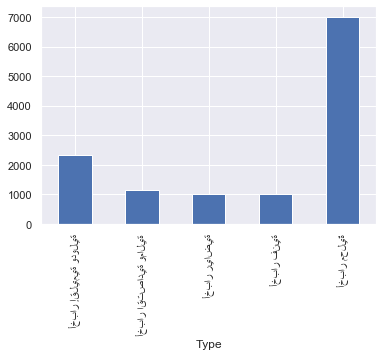

In [13]:
useful.groupby('Type').size().plot(kind='bar')

In [14]:
useful[useful['Desc']=='\n']['Desc'] = useful[useful['Desc']=='\n']['Title']

C:\Users\Hadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
useful[useful['Desc']=='\n']

,Id,Title,Date,Desc,Image,Type
473,1350470,"بو صعب لـ""المستقبل"": التيار لا يعرقل تمثيل الق...",2018-07-17 06:33:00,\n,NaN,أخبار محليّة
976,1350975,بدء اعتصام متعاقدي اللبنانية عند مفرق القصر ا...,2018-07-18 12:19:00,\n,NaN,أخبار محليّة
3869,1353863,بهية الحريري اطلعت من وزير البيئة على نتائج زي...,2018-07-25 17:25:00,\n,NaN,أخبار محليّة
6902,1356843,المركز اللبناني للمعلومات في واشنطن: لوضع خطة ...,2018-08-02 16:45:00,\n,http://www.lebanonfiles.com/files/images/02-08...,أخبار محليّة
9048,1358990,الحكومة الاسترالية تجرّد 5 استراليين من جنسيته...,2018-08-09 09:21:00,\n,NaN,أخبار إقليمية ودولية
9290,1359233,مجلس الأمن دان الإعتداء على اليونيفيل في مجدل ...,2018-08-09 21:51:00,\n,NaN,أخبار محليّة
9566,1359506,تجمع الأطباء دعا مجلس النقابة الى تسيير شؤون ا...,2018-08-10 15:59:00,\n,http://www.lebanonfiles.com/files/images/10-08...,أخبار محليّة
10719,1360658,"الاسمر عرض مع لجنة عودة النازحين بـ""التيار"" سب...",2018-08-14 13:25:00,\n,http://www.lebanonfiles.com/files/images/14-08...,أخبار اقتصادية ومالية
15103,1365043,ماتيس: قرار تركيا الحصول على أنظمة روسية مضادة...,2018-08-28 17:48:00,\n,NaN,أخبار إقليمية ودولية
15148,1365088,وزير الدولة الاماراتي للشؤون الخارجية: موقف كت...,2018-08-28 19:59:00,\n,NaN,أخبار محليّة
